In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = r'F:/cat dog/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [31]:
base_dir

'F:/cat dog/'

In [32]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [34]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/cat dog/train'

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

# ANOTHER APPROACH

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras import layers, models, optimizers
# import numpy as np

# # Define a function to extract features using VGG16
# def extract_features(directory, sample_count):
#     datagen = ImageDataGenerator(rescale=1./255)
#     conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    
#     features = np.zeros((sample_count, 4, 4, 512))
#     labels = np.zeros((sample_count))
    
#     generator = datagen.flow_from_directory(
#         directory,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary'
#     )
    
#     i = 0
# for inputs_batch, labels_batch in generator:
#     features_batch = conv_base.predict(inputs_batch)
#     features[i * batch_size : (i + 1) * batch_size] = features_batch
#     labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#     i += 1
#     i += 1
#     if i * batch_size >= sample_count:
#         break

# # Check if the loop terminated due to the condition
# if i * batch_size >= sample_count:
#     break

# # Return the extracted features and labels
# return features, labels


# # Define your directory paths and sample counts
# train_dir = 'F:/cat dog/training_set'
# validation_dir = 'F:/cat dog/validation_data'
# test_dir = 'F:/cat dog/test_set'
# train_sample_count = 2000
# validation_sample_count = 1000
# test_sample_count = 1000

# # Extract features and labels for training, validation, and test sets
# train_features, train_labels = extract_features(train_dir, train_sample_count)
# validation_features, validation_labels = extract_features(validation_dir, validation_sample_count)
# test_features, test_labels = extract_features(test_dir, test_sample_count)

# # Define your neural network model
# model = models.Sequential()
# model.add(layers.Flatten(input_shape=(4, 4, 512)))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
#               loss='binary_crossentropy',
#               metrics=['acc'])

# # Train your model
# history = model.fit(train_features, train_labels,
#                     epochs=30,
#                     batch_size=20,
#                     validation_data=(validation_features, validation_labels))


In [29]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

NameError: name 'train_features' is not defined

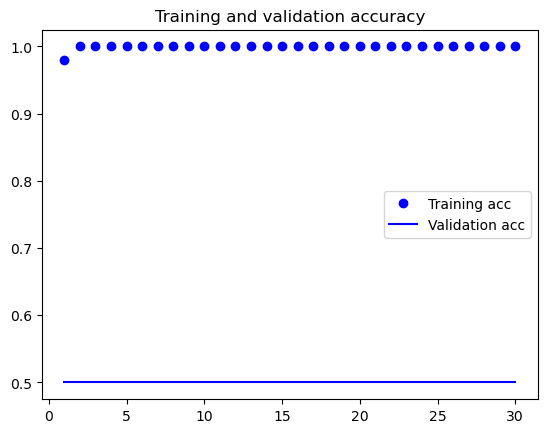

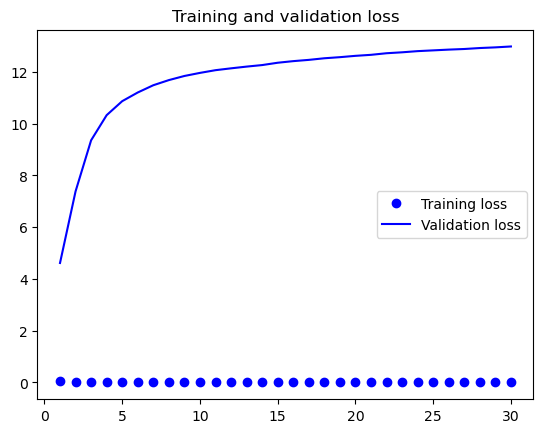

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/cat dog/train'

In [ ]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

NameError: name 'model' is not defined

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
if layer.name == 'block5_conv1':
set_trainable = True
if set_trainable:
layer.trainable = True
else:
layer.trainable = False